# Get the Data

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
SEED = 1234
np.random.seed(SEED)
random.seed(SEED)

# Read from CSV to Pandas DataFrame
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/tumors.csv"
df = pd.read_csv(url, header=0) # load
df = df.sample(frac=1).reset_index(drop=True)
df.head()

# # Correlation matrix
# plt.matshow(df.corr())
# continuous_features = df.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation='45')
# plt.yticks(range(len(continuous_features)), continuous_features, rotation='45')
# plt.colorbar()
# plt.show()

# Define X and y
X = df[['leukocyte_count', 'blood_pressure']].values
y = df['tumor_class'].values

# y.shape

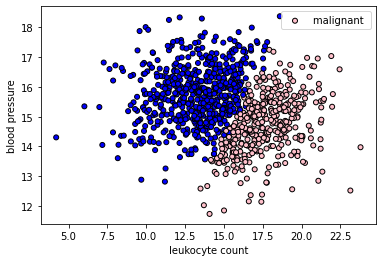

In [2]:
# Plot data
colors = {'benign': 'pink', 'malignant': 'blue'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('leukocyte count')
plt.ylabel('blood pressure')
plt.legend(['malignant ', 'benign'], loc="upper right")
plt.show()

# Split data

TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

X[0:12]

In [20]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

X_train=X[0:int(len(X)*TRAIN_SIZE)];
y_train=y[0:int(len(y)*TRAIN_SIZE)];
X_test=X[int(len(X)*TRAIN_SIZE):int(len(X)*(TRAIN_SIZE+TEST_SIZE))];
y_test=y[int(len(y)*TRAIN_SIZE):int(len(y)*(TRAIN_SIZE+TEST_SIZE))];

# print(f'{X_train[0]}->{y_train[0]}');

# Label encoding

In [17]:
label={}

c=0;

for i in y:
    if i not in label:
        label[i]=c
        c+=1;
# label
# Class weights

import collections
counts = dict(collections.Counter(y_train))
class_weights = {i: 1.0/counts[i] for i in counts}
print (f"counts: {counts}\nweights: {class_weights}")

counts: {'benign': 269, 'malignant': 431}
weights: {'benign': 0.0037174721189591076, 'malignant': 0.002320185614849188}


# Standardize data

In [19]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
# Check (means should be ~0 and std should be ~1)
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

NameError: name 'X_test' is not defined